# <Center> RATE OF PENETRATION PREDICTION 
# <Center> OF SAGD PRODUCER WELL
### Rate of Penetration (ROP) Prediction – Regression Model

#### Data Source: Pason - EDR(Electronic Drilling Recorder)
#### Data Name: Drilling Prediction
#### Dataset: DrillingParameters.csv

## 1. Problem

### 1.1 What problem am I solving?

Throughout the oil and gas history, oil and gas companies have improved performance by reducing total drilling costs. Some of the high cost of a drilling operation comes from the drilling rig, directional tools, and equipment associated with the drilling operation. Thus, with the implementation of data science in this sector, companies have seen significant value in processing the massive amount of data produced by all the sensors installed at the rig. The solution of this project is to combine machine learning and industry experience to analyze some of the drilling parameters of a Steam-Assisted Gravity Drainage (SAGD) production well to predict the rate of penetration and reduce drilling costs for future wells. 
Rate of penetration (ROP): represents the rate at which the drilling bit progress. It translates the efficiency to drill a well. 

### 1.2 Why is it worth Solving?

The analysis of the drilling parameters will be used to predict the Rate of Penetration (ROP) and optimize drilling parameters for future wells in the same pad. This ROP optimization will reduce the cost of the drilling rig, directional tools, and equipment. The results of this study will be an incentive for cost reduction due to the drop in oil prices in the last couple of years. 

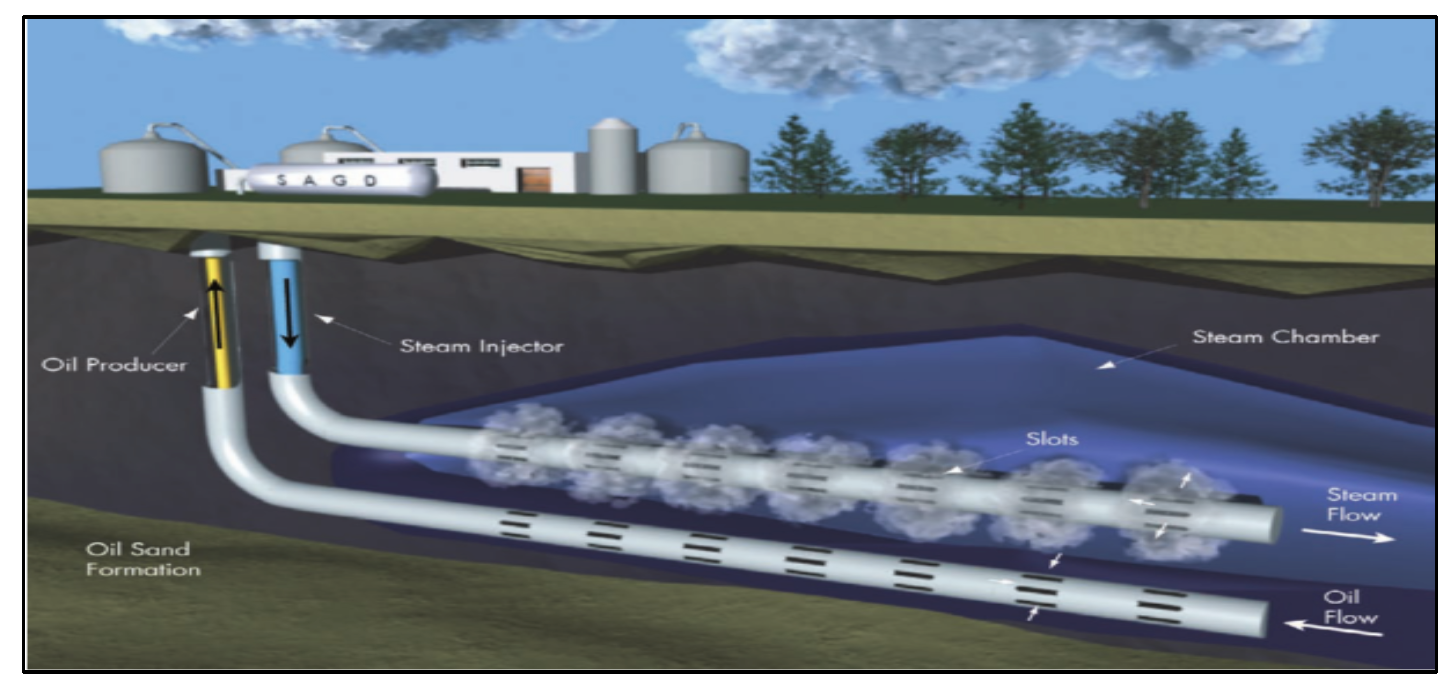

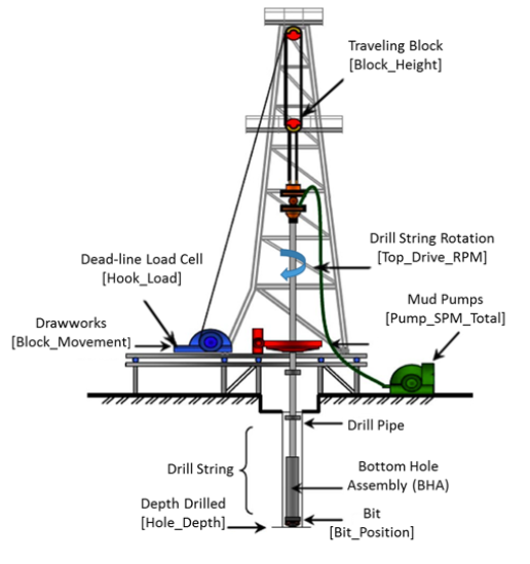

### 1.3 What are the requirements for crafting a solution for this problem?

During a drilling operation, all the drilling parameters are recorded using an Electronic Drilling Recorder (EDR). An EDR is a computer system that gathers information from all sensors related to the drilling operation. For this analysis, the drilling parameters downloaded from the EDR are as follows:


* BDEPT	= Bit Depth 	m MD
* DEPT	= Hole Depth 	m MD
* OBR	= On Bottom Rate of Penetration 	m/hr
* HL	= Hook Load 	kDaN
* WOB	= Weight on Bit	kDaN
* RPM	= Revolutions per Minute 	rpm
* TOR	= Torque 	N.m
* TPO	= Total Pump Output 	m3/min
* SPP	= Standpipe Pressure (kPa)	kPa
* SPM1	= Strokes per Minute 	strokes/min
* TOP	= Time of penetration (min/m)	min/m
* ROP	= Rate of Penetration	m/hr




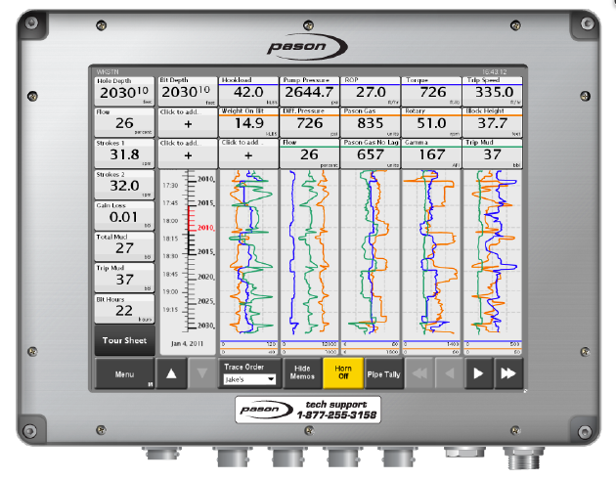

# 2. Methodology


## How do I solve the problem?

### Perform an Exploratory Data Analysis (EDA)
    - Rename columns 
    - Remove unused columns
    - Calculate new columns
    - Delete unused rows
    - Check for missing data 
    - Data cleaning
    - Remove unused features
    - Check and Remove outliers

In [2]:
import pickle

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

## 2.1 Import Raw Data

In [3]:
df=pd.read_csv("DrillingParameters.csv")
print(df)

       ~A BDEP     DEPT  OBR    HL  WOB  RPM  TOR   TPO   SPP  SPM1  ROP  TOP  \
0       173.71   174.11  0.0  24.3  0.7    0  0.0  0.76   494     0  0.0  0.0   
1       173.71   174.11  0.0  24.3  0.7    0  0.0  0.76   490     0  0.0  0.0   
2       173.71   174.11  0.0  24.3  0.7    0  0.0  0.76   491     0  0.0  0.0   
3       173.71   174.11  0.0  24.3  0.7    0  0.0  0.76   489     0  0.0  0.0   
4       173.71   174.11  0.0  24.3  0.7    0  0.0  0.76   489     0  0.0  0.0   
...        ...      ...  ...   ...  ...  ...  ...   ...   ...   ...  ...  ...   
27955  1095.36  1095.76  0.0  21.2  1.6    0  0.0  0.00     0     0  0.0  0.0   
27956  1095.36  1095.76  0.0  21.2  2.4    0  0.0  1.60  3532    52  0.0  0.0   
27957  1095.36  1095.76  0.0  20.6  2.1    0  0.0  2.52  5395    83  0.0  0.0   
27958  1095.36  1095.76  0.0  21.6  2.1    0  0.0  1.51  5441    50  0.0  0.0   
27959  1095.36  1095.76  0.0  21.4  2.0    0  0.0  0.98  2762    33  0.0  0.0   

       YYMMDD HHMMSS  Unnam

In [4]:
df.head()

~A BDEP    DEPT  OBR    HL  WOB  RPM  TOR   TPO  SPP  SPM1  ROP  TOP  \
0   173.71  174.11  0.0  24.3  0.7    0  0.0  0.76  494     0  0.0  0.0   
1   173.71  174.11  0.0  24.3  0.7    0  0.0  0.76  490     0  0.0  0.0   
2   173.71  174.11  0.0  24.3  0.7    0  0.0  0.76  491     0  0.0  0.0   
3   173.71  174.11  0.0  24.3  0.7    0  0.0  0.76  489     0  0.0  0.0   
4   173.71  174.11  0.0  24.3  0.7    0  0.0  0.76  489     0  0.0  0.0   

   YYMMDD HHMMSS  Unnamed: 13  Unnamed: 14  
0  140217 190000          NaN          NaN  
1  140217 190010          NaN          NaN  
2  140217 190020          NaN          NaN  
3  140217 190030          NaN          NaN  
4  140217 190040          NaN          NaN

## 2.1 Exploratory Data Analysis (EDA)

### 2.1.1 Rename Columns

In [5]:
renamed_col = {
    '~A BDEP': 'Bit_depth_m_MD',
    'DEPT': 'Hole_depth_m_MD',
    'OBR' : 'On_bottom_ROP_m_hr',
    'HL': 'Hook_load_kDaN',
    'WOB': 'WOB_kDaN',
    'TOR': 'Torque_N_m',
    'TPO': 'Total_pump_output_m3_min',
    'SPP': 'Standpipe_pressure_kPa',
    'SPM': 'Stroke_per_min',
    'ROP': 'ROP_m_hr',
    'TOP': 'TOP_min_m',
    'YYMMDD HHMMSS': 'Date',
}
df.rename(renamed_col, axis='columns', inplace=True)

In [6]:
df.head()

Bit_depth_m_MD  Hole_depth_m_MD  On_bottom_ROP_m_hr  Hook_load_kDaN  \
0          173.71           174.11                 0.0            24.3   
1          173.71           174.11                 0.0            24.3   
2          173.71           174.11                 0.0            24.3   
3          173.71           174.11                 0.0            24.3   
4          173.71           174.11                 0.0            24.3   

   WOB_kDaN  RPM  Torque_N_m  Total_pump_output_m3_min  \
0       0.7    0         0.0                      0.76   
1       0.7    0         0.0                      0.76   
2       0.7    0         0.0                      0.76   
3       0.7    0         0.0                      0.76   
4       0.7    0         0.0                      0.76   

   Standpipe_pressure_kPa  SPM1  ROP_m_hr  TOP_min_m           Date  \
0                     494     0       0.0        0.0  140217 190000   
1                     490     0       0.0        0.0  140217 190010   
2                     491     0       0.0        0.0  140217 190020   
3                     489     0       0.0        0.0  140217 190030   
4                     489     0       0.0        0.0  140217 190040   

   Unnamed: 13  Unnamed: 14  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN

## 2.1.2 Remove Unused Columns
 
#### Delete extra columns that were generated when importing the raw data.

In [7]:
df1 = df.drop(['Unnamed: 13','Unnamed: 14'], axis = 1)
df1.head()

Bit_depth_m_MD  Hole_depth_m_MD  On_bottom_ROP_m_hr  Hook_load_kDaN  \
0          173.71           174.11                 0.0            24.3   
1          173.71           174.11                 0.0            24.3   
2          173.71           174.11                 0.0            24.3   
3          173.71           174.11                 0.0            24.3   
4          173.71           174.11                 0.0            24.3   

   WOB_kDaN  RPM  Torque_N_m  Total_pump_output_m3_min  \
0       0.7    0         0.0                      0.76   
1       0.7    0         0.0                      0.76   
2       0.7    0         0.0                      0.76   
3       0.7    0         0.0                      0.76   
4       0.7    0         0.0                      0.76   

   Standpipe_pressure_kPa  SPM1  ROP_m_hr  TOP_min_m           Date  
0                     494     0       0.0        0.0  140217 190000  
1                     490     0       0.0        0.0  140217 190010  
2                     491     0       0.0        0.0  140217 190020  
3                     489     0       0.0        0.0  140217 190030  
4                     489     0       0.0        0.0  140217 190040

## 2.1.3 Calculate  a new column

Only drilling data (rotating and sliding) will be considered in this analysis. Thus, a new column is created to identify the values that are only recorded while drilling. In this case, if the bit hole is equal to hole depth, it means that the drilling bit is on the bottom, and drilling is in progress. 

In [8]:
df1['Drilling_Yes_No'] = np.where(df['Bit_depth_m_MD'] == df['Hole_depth_m_MD'], 'YES', 'NO')
print(df1)

       Bit_depth_m_MD  Hole_depth_m_MD  On_bottom_ROP_m_hr  Hook_load_kDaN  \
0              173.71           174.11                 0.0            24.3   
1              173.71           174.11                 0.0            24.3   
2              173.71           174.11                 0.0            24.3   
3              173.71           174.11                 0.0            24.3   
4              173.71           174.11                 0.0            24.3   
...               ...              ...                 ...             ...   
27955         1095.36          1095.76                 0.0            21.2   
27956         1095.36          1095.76                 0.0            21.2   
27957         1095.36          1095.76                 0.0            20.6   
27958         1095.36          1095.76                 0.0            21.6   
27959         1095.36          1095.76                 0.0            21.4   

       WOB_kDaN  RPM  Torque_N_m  Total_pump_output_m3_min  \
0

In [9]:
print(df1.columns)

Index(['Bit_depth_m_MD', 'Hole_depth_m_MD', 'On_bottom_ROP_m_hr',
       'Hook_load_kDaN', 'WOB_kDaN', 'RPM', 'Torque_N_m',
       'Total_pump_output_m3_min', 'Standpipe_pressure_kPa', 'SPM1',
       'ROP_m_hr', 'TOP_min_m', 'Date', 'Drilling_Yes_No'],
      dtype='object')


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27960 entries, 0 to 27959
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bit_depth_m_MD            27960 non-null  float64
 1   Hole_depth_m_MD           27960 non-null  float64
 2   On_bottom_ROP_m_hr        27960 non-null  float64
 3   Hook_load_kDaN            27960 non-null  float64
 4   WOB_kDaN                  27960 non-null  float64
 5   RPM                       27960 non-null  int64  
 6   Torque_N_m                27960 non-null  float64
 7   Total_pump_output_m3_min  27960 non-null  float64
 8   Standpipe_pressure_kPa    27960 non-null  int64  
 9   SPM1                      27960 non-null  int64  
 10  ROP_m_hr                  27960 non-null  float64
 11  TOP_min_m                 27960 non-null  float64
 12  Date                      27960 non-null  object 
 13  Drilling_Yes_No           27960 non-null  object 
dtypes: flo

## 2.1.4 Remove Unused Rows

This dataset contains 27960 data samples recorded in Pason every 10 seconds. It includes data while drilling, circulating, tripping in and out of the hole, connection time, rig service, and Non-productive time (NPT). Thus, the purpose of this analysis is to predict the rate of penetration (ROP), and this only happens when drilling is in progress. So, the "No" values in the column (drilling_Yes_No) are deleted.

In [11]:
df1 = df1[df1.Drilling_Yes_No != 'NO']
print(df1)

       Bit_depth_m_MD  Hole_depth_m_MD  On_bottom_ROP_m_hr  Hook_load_kDaN  \
130            174.14           174.14                0.00            27.0   
131            174.25           174.25                8.28            25.0   
132            174.37           174.37                8.28            24.2   
133            174.49           174.49               42.77            24.7   
134            174.72           174.72               58.89            24.0   
...               ...              ...                 ...             ...   
27893         1095.10          1095.10               89.86            16.0   
27894         1095.50          1095.50              156.23            15.5   
27895         1095.69          1095.69              171.24            21.5   
27896         1095.76          1095.76              171.24            21.7   
27897         1095.76          1095.76              171.24            29.4   

       WOB_kDaN  RPM  Torque_N_m  Total_pump_output_m3_min  \
1

###  - The size of this dataset is reduced from 27960 samples to 9002 samples.

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9002 entries, 130 to 27897
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bit_depth_m_MD            9002 non-null   float64
 1   Hole_depth_m_MD           9002 non-null   float64
 2   On_bottom_ROP_m_hr        9002 non-null   float64
 3   Hook_load_kDaN            9002 non-null   float64
 4   WOB_kDaN                  9002 non-null   float64
 5   RPM                       9002 non-null   int64  
 6   Torque_N_m                9002 non-null   float64
 7   Total_pump_output_m3_min  9002 non-null   float64
 8   Standpipe_pressure_kPa    9002 non-null   int64  
 9   SPM1                      9002 non-null   int64  
 10  ROP_m_hr                  9002 non-null   float64
 11  TOP_min_m                 9002 non-null   float64
 12  Date                      9002 non-null   object 
 13  Drilling_Yes_No           9002 non-null   object 
dtypes: fl

### - Check histrogram for each feature - Initial

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


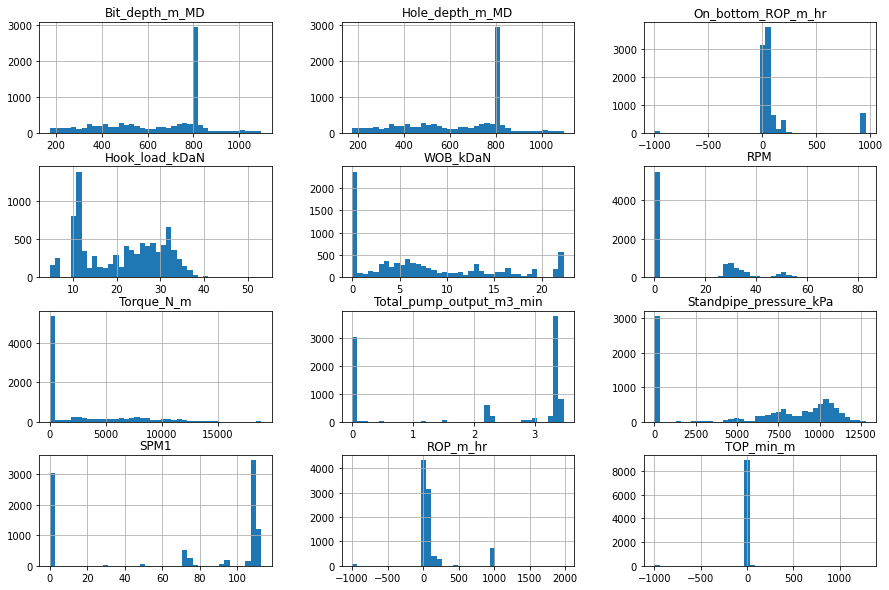

In [13]:
hist = df1.hist(bins=40, figsize=(15, 10))

## 2.1.5 Check For Missing Data 

### 2.1.5.1  No missing values were found in this dataset.
    

In [14]:
def missing_data(df1):
    total = df1.isnull().sum().sort_values(ascending = False)
    percent = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df1)

Total  Percent
Bit_depth_m_MD                0      0.0
Hole_depth_m_MD               0      0.0
On_bottom_ROP_m_hr            0      0.0
Hook_load_kDaN                0      0.0
WOB_kDaN                      0      0.0
RPM                           0      0.0
Torque_N_m                    0      0.0
Total_pump_output_m3_min      0      0.0
Standpipe_pressure_kPa        0      0.0
SPM1                          0      0.0
ROP_m_hr                      0      0.0
TOP_min_m                     0      0.0
Date                          0      0.0
Drilling_Yes_No               0      0.0

In [15]:
df1.describe(include='all')

Bit_depth_m_MD  Hole_depth_m_MD  On_bottom_ROP_m_hr  Hook_load_kDaN  \
count      9002.000000      9002.000000         9002.000000     9002.000000   
unique             NaN              NaN                 NaN             NaN   
top                NaN              NaN                 NaN             NaN   
freq               NaN              NaN                 NaN             NaN   
mean        651.715214       651.715214          113.782003       21.164552   
std         216.226676       216.226676          275.669401        9.091266   
min         174.140000       174.140000         -999.250000        4.700000   
25%         480.630000       480.630000            0.000000       11.500000   
50%         747.265000       747.265000           43.290000       22.500000   
75%         808.000000       808.000000           74.840000       29.300000   
max        1095.760000      1095.760000          959.610000       53.100000   

           WOB_kDaN          RPM    Torque_N_m  Total_pump_output_m3_min  \
count   9002.000000  9002.000000   9002.000000               9002.000000   
unique          NaN          NaN           NaN                       NaN   
top             NaN          NaN           NaN                       NaN   
freq            NaN          NaN           NaN                       NaN   
mean       7.525650    13.861253   2628.837224                  2.085771   
std        7.029349    18.199501   3882.704648                  1.540286   
min        0.000000     0.000000      0.000000                  0.000000   
25%        0.000000     0.000000      0.000000                  0.000000   
50%        5.900000     0.000000      0.000000                  3.310000   
75%       12.975000    31.000000   5157.887500                  3.370000   
max       22.300000    83.000000  18849.200000                  3.470000   

        Standpipe_pressure_kPa         SPM1     ROP_m_hr    TOP_min_m  \
count              9002.000000  9002.000000  9002.000000  9002.000000   
unique                     NaN          NaN          NaN          NaN   
top                        NaN          NaN          NaN          NaN   
freq                       NaN          NaN          NaN          NaN   
mean               5971.695401    68.302933   117.034280    -6.663375   
std                4562.087052    50.287761   278.398546    90.189958   
min                   0.000000     0.000000  -999.250000  -999.250000   
25%                   0.000000     0.000000     0.000000     0.000000   
50%                7660.000000   108.000000    43.810000     0.770000   
75%               10118.500000   110.000000    74.840000     1.230000   
max               12790.000000   113.000000  1975.890000  1279.180000   

                 Date Drilling_Yes_No  
count            9002            9002  
unique           9002               1  
top     140218 023020             YES  
freq                1            9002  
mean              NaN             NaN  
std               NaN             NaN  
min               NaN             NaN  
25%               NaN             NaN  
50%               NaN             NaN  
75%               NaN             NaN  
max               NaN             NaN

In [16]:
df1.describe().transpose()

count         mean          std     min     25%  \
Bit_depth_m_MD            9002.0   651.715214   216.226676  174.14  480.63   
Hole_depth_m_MD           9002.0   651.715214   216.226676  174.14  480.63   
On_bottom_ROP_m_hr        9002.0   113.782003   275.669401 -999.25    0.00   
Hook_load_kDaN            9002.0    21.164552     9.091266    4.70   11.50   
WOB_kDaN                  9002.0     7.525650     7.029349    0.00    0.00   
RPM                       9002.0    13.861253    18.199501    0.00    0.00   
Torque_N_m                9002.0  2628.837224  3882.704648    0.00    0.00   
Total_pump_output_m3_min  9002.0     2.085771     1.540286    0.00    0.00   
Standpipe_pressure_kPa    9002.0  5971.695401  4562.087052    0.00    0.00   
SPM1                      9002.0    68.302933    50.287761    0.00    0.00   
ROP_m_hr                  9002.0   117.034280   278.398546 -999.25    0.00   
TOP_min_m                 9002.0    -6.663375    90.189958 -999.25    0.00   

                               50%         75%       max  
Bit_depth_m_MD             747.265    808.0000   1095.76  
Hole_depth_m_MD            747.265    808.0000   1095.76  
On_bottom_ROP_m_hr          43.290     74.8400    959.61  
Hook_load_kDaN              22.500     29.3000     53.10  
WOB_kDaN                     5.900     12.9750     22.30  
RPM                          0.000     31.0000     83.00  
Torque_N_m                   0.000   5157.8875  18849.20  
Total_pump_output_m3_min     3.310      3.3700      3.47  
Standpipe_pressure_kPa    7660.000  10118.5000  12790.00  
SPM1                       108.000    110.0000    113.00  
ROP_m_hr                    43.810     74.8400   1975.89  
TOP_min_m                    0.770      1.2300   1279.18

## 2.1.6 Data Cleaning

### 2.1.6.1 Replace "-999.25" values for NaN

In [17]:
df2 = df1.replace(-999.25, np.nan)
df2.describe().transpose()

count         mean          std     min     25%  \
Bit_depth_m_MD            9002.0   651.715214   216.226676  174.14  480.63   
Hole_depth_m_MD           9002.0   651.715214   216.226676  174.14  480.63   
On_bottom_ROP_m_hr        8919.0   124.139852   255.075842    0.00    0.00   
Hook_load_kDaN            9002.0    21.164552     9.091266    4.70   11.50   
WOB_kDaN                  9002.0     7.525650     7.029349    0.00    0.00   
RPM                       9002.0    13.861253    18.199501    0.00    0.00   
Torque_N_m                9002.0  2628.837224  3882.704648    0.00    0.00   
Total_pump_output_m3_min  9002.0     2.085771     1.540286    0.00    0.00   
Standpipe_pressure_kPa    9002.0  5971.695401  4562.087052    0.00    0.00   
SPM1                      9002.0    68.302933    50.287761    0.00    0.00   
ROP_m_hr                  8930.0   126.034557   260.771396    0.00    0.00   
TOP_min_m                 8930.0     1.339563    13.829921    0.00    0.00   

                               50%         75%       max  
Bit_depth_m_MD             747.265    808.0000   1095.76  
Hole_depth_m_MD            747.265    808.0000   1095.76  
On_bottom_ROP_m_hr          44.900     74.8500    959.61  
Hook_load_kDaN              22.500     29.3000     53.10  
WOB_kDaN                     5.900     12.9750     22.30  
RPM                          0.000     31.0000     83.00  
Torque_N_m                   0.000   5157.8875  18849.20  
Total_pump_output_m3_min     3.310      3.3700      3.47  
Standpipe_pressure_kPa    7660.000  10118.5000  12790.00  
SPM1                       108.000    110.0000    113.00  
ROP_m_hr                    44.910     74.8500   1975.89  
TOP_min_m                    0.770      1.2300   1279.18

In [18]:
#Variables that contain "NaN" values 

vars_with_na = [var for var in df2.columns if df2[var].isnull().mean() > 0]
vars_with_na

['On_bottom_ROP_m_hr', 'ROP_m_hr', 'TOP_min_m']

### 2.1.6.2 Check and Delete Null Values "NaN"

#### The features that contain null value are:

- On bottom ROP
- Rate of penetration
- Time of penetration

In [19]:
data_na = df2.isnull().sum()
data_na

Bit_depth_m_MD               0
Hole_depth_m_MD              0
On_bottom_ROP_m_hr          83
Hook_load_kDaN               0
WOB_kDaN                     0
RPM                          0
Torque_N_m                   0
Total_pump_output_m3_min     0
Standpipe_pressure_kPa       0
SPM1                         0
ROP_m_hr                    72
TOP_min_m                   72
Date                         0
Drilling_Yes_No              0
dtype: int64

In [20]:
# Calculate percentage of "NaN" values 

data_na_per =df2[vars_with_na].isnull().mean()
data_na_per

On_bottom_ROP_m_hr    0.009220
ROP_m_hr              0.007998
TOP_min_m             0.007998
dtype: float64

In [21]:
df3 = df2.dropna()
df3.describe().transpose()

count         mean          std     min     25%  \
Bit_depth_m_MD            8919.0   650.099146   216.576157  174.14  477.57   
Hole_depth_m_MD           8919.0   650.099146   216.576157  174.14  477.57   
On_bottom_ROP_m_hr        8919.0   124.139852   255.075842    0.00    0.00   
Hook_load_kDaN            8919.0    21.239208     9.096874    4.70   11.50   
WOB_kDaN                  8919.0     7.567070     7.020337    0.00    0.00   
RPM                       8919.0    13.990246    18.234574    0.00    0.00   
Torque_N_m                8919.0  2653.297673  3892.403275    0.00    0.00   
Total_pump_output_m3_min  8919.0     2.105181     1.534175    0.00    0.00   
Standpipe_pressure_kPa    8919.0  6027.267855  4546.576104    0.00    0.00   
SPM1                      8919.0    68.938558    50.085637    0.00    0.00   
ROP_m_hr                  8919.0   124.139852   255.075842    0.00    0.00   
TOP_min_m                 8919.0     1.341172    13.838371    0.00    0.00   

                              50%        75%       max  
Bit_depth_m_MD             742.73    808.000   1095.76  
Hole_depth_m_MD            742.73    808.000   1095.76  
On_bottom_ROP_m_hr          44.90     74.850    959.61  
Hook_load_kDaN              22.60     29.400     53.10  
WOB_kDaN                     5.90     13.000     22.30  
RPM                          0.00     31.000     83.00  
Torque_N_m                   0.00   5214.375  18849.20  
Total_pump_output_m3_min     3.31      3.370      3.47  
Standpipe_pressure_kPa    7709.00  10129.500  12790.00  
SPM1                       108.00    110.000    113.00  
ROP_m_hr                    44.90     74.850    959.61  
TOP_min_m                    0.77      1.230   1279.18

### 2.1.6.3 Delete Zero Values in ROP, WOB, and Total Pump Output

The ROP with zero values indicates that drilling is not in progress. Thus, the ROP (target output) with zero values should be deleted.

In [22]:
# check for total of zero values in each variable

column = df3[['ROP_m_hr','WOB_kDaN','Total_pump_output_m3_min']]
count = column[column ==0].count()
print(count)

ROP_m_hr                    2373
WOB_kDaN                    2253
Total_pump_output_m3_min    2956
dtype: int64


### 2.1.6.4 Delete Zero Values in ROP, WOB, and Total Pump Output

In [23]:
df4 = df3.loc[df3["ROP_m_hr"] !=0]

In [24]:
df5 = df4.loc[df4["WOB_kDaN"] !=0]
df6 = df5.loc[df5["Total_pump_output_m3_min"] !=0]

In [25]:
column = df6[['WOB_kDaN','ROP_m_hr','Total_pump_output_m3_min']]
count = column[column ==0].count()
print(count)

WOB_kDaN                    0
ROP_m_hr                    0
Total_pump_output_m3_min    0
dtype: int64


In [26]:
df6.describe().transpose()

count         mean          std     min      25%  \
Bit_depth_m_MD            5677.0   574.954904   226.805402  174.25   394.12   
Hole_depth_m_MD           5677.0   574.954904   226.805402  174.25   394.12   
On_bottom_ROP_m_hr        5677.0    68.971164    49.587179    0.84    39.05   
Hook_load_kDaN            5677.0    26.256209     6.253506   10.30    22.60   
WOB_kDaN                  5677.0     8.727585     4.977357    0.10     4.90   
RPM                       5677.0    20.558922    18.934038    0.00     0.00   
Torque_N_m                5677.0  3988.195444  4154.670334    0.00     0.00   
Total_pump_output_m3_min  5677.0     3.179651     0.412941    0.51     3.32   
Standpipe_pressure_kPa    5677.0  9126.247314  1848.376129    0.00  7777.00   
SPM1                      5677.0   104.083671    12.876092    8.00   108.00   
ROP_m_hr                  5677.0    68.971164    49.587179    0.84    39.05   
TOP_min_m                 5677.0     1.792186     3.391447    0.21     0.79   

                              50%       75%       max  
Bit_depth_m_MD             551.68    754.21   1095.76  
Hole_depth_m_MD            551.68    754.21   1095.76  
On_bottom_ROP_m_hr          57.95     75.76    289.52  
Hook_load_kDaN              27.20     31.40     44.70  
WOB_kDaN                     7.30     13.00     20.80  
RPM                         29.00     34.00     83.00  
Torque_N_m                2673.50   7585.28  15574.70  
Total_pump_output_m3_min     3.36      3.38      3.47  
Standpipe_pressure_kPa    9665.00  10538.00  12790.00  
SPM1                       110.00    110.00    113.00  
ROP_m_hr                    57.95     75.76    289.52  
TOP_min_m                    1.04      1.54     71.71

In [27]:
df6.to_csv(r'Drillingdf6.csv', index=False)

## 2.1.7 Remove Unused Features

#### The features that are not considered in this analysis are:

    - On_bottom_ROP_m_hr has the same values as ROP_m_hr.
    - Drilling_Yes_No 
    - Hole_depth_m_MD
    - SPM1
    - TOP_min_m
    

In [28]:
dfwrg1 = df6.drop(columns = ['On_bottom_ROP_m_hr', 'Drilling_Yes_No', 
                             'Hole_depth_m_MD','SPM1', 'TOP_min_m' ])

In [29]:
dfwrg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5677 entries, 131 to 27897
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bit_depth_m_MD            5677 non-null   float64
 1   Hook_load_kDaN            5677 non-null   float64
 2   WOB_kDaN                  5677 non-null   float64
 3   RPM                       5677 non-null   int64  
 4   Torque_N_m                5677 non-null   float64
 5   Total_pump_output_m3_min  5677 non-null   float64
 6   Standpipe_pressure_kPa    5677 non-null   int64  
 7   ROP_m_hr                  5677 non-null   float64
 8   Date                      5677 non-null   object 
dtypes: float64(6), int64(2), object(1)
memory usage: 443.5+ KB


In [30]:
# Saving dataset 

dfwrg1.to_csv(r'DrillingPWRG1.csv', index=False)

## 2.1.8 Check and Remove Outliers

Box plots are used to identify outliers in each feature. Each feature is analyzed independently to verify which outliers are important or not in this analysis.

In a box plot, the data is divided into five sections:

*  Minimum
*  First quartile (Q1) 25th 
*  Median  
*  Third quartile (Q3) 75th
*  Maximum

#### $$ Minimum =  Q1 - 1.5 * IQR $$
#### $$ Maximum = Q3 + 1.5 * IQR $$

#### <center> Interquartile Range (IQR) is the range from Q1 to Q3 

Following the theory above, outliers are defined as any value (data points) that are outside the range of 1.5 times the IQR.



In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl
%matplotlib inline


#for Q-Q plots
import scipy.stats as stats

from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

import ssl

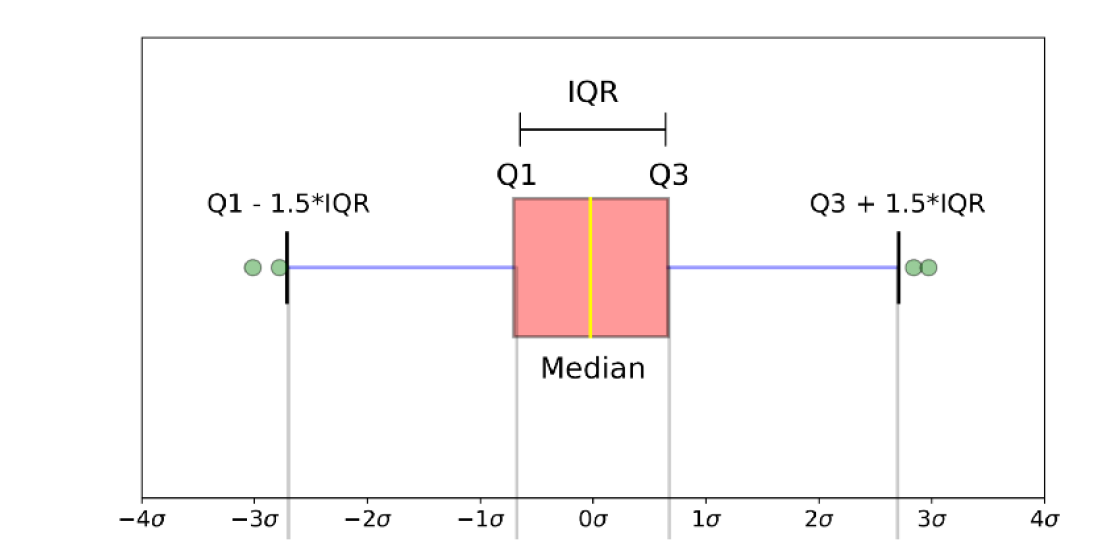

In [32]:
def diagnostic_plots(df, variable):
    #function takes a dataframe (df) and 
    # the variable of interest as arguments
    
    # define figure size
    plt.figure(figsize=(14, 4))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins= 50)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Variable quantiles')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

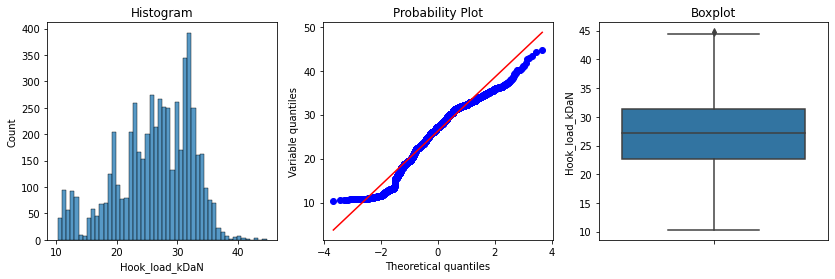

In [33]:
diagnostic_plots(dfwrg1, 'Hook_load_kDaN')

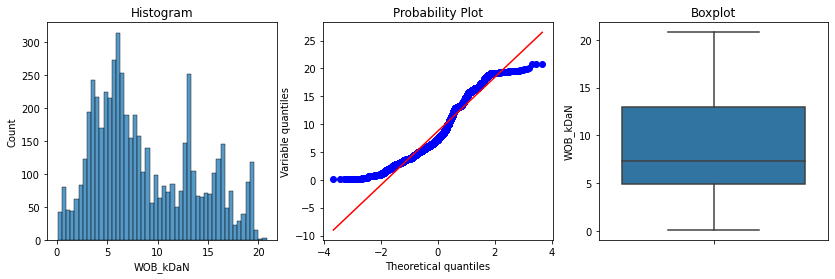

In [34]:
diagnostic_plots(dfwrg1, 'WOB_kDaN')

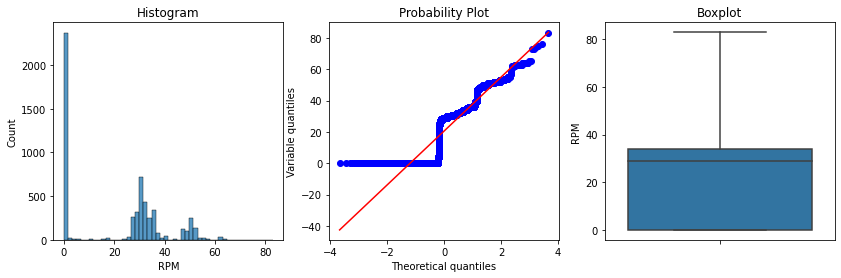

In [35]:
diagnostic_plots(dfwrg1, 'RPM')

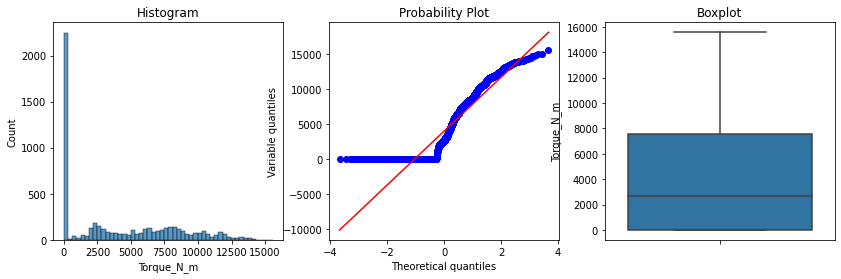

In [36]:
diagnostic_plots(dfwrg1, 'Torque_N_m')

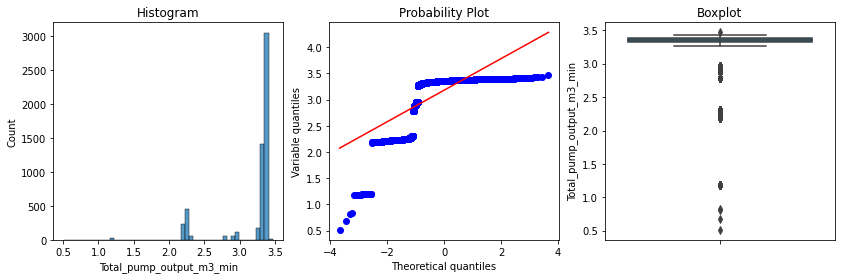

In [37]:
diagnostic_plots(dfwrg1, 'Total_pump_output_m3_min')

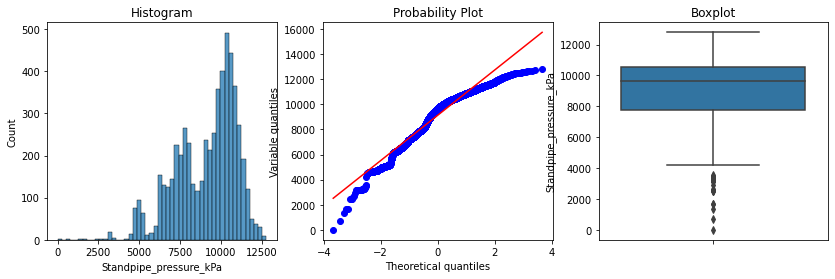

In [38]:
diagnostic_plots(dfwrg1, 'Standpipe_pressure_kPa')

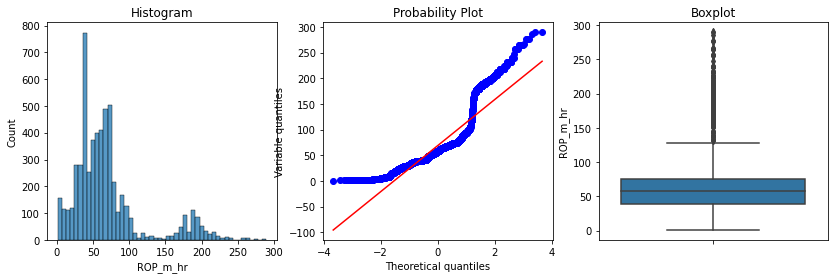

In [39]:
diagnostic_plots(dfwrg1, 'ROP_m_hr')

### 2.1.8.1 Delete Total Pump output (m3/min) outliers 

After reviewing the box plot for each parameter, some of the outliers from the total pump output will be deleted.  Even though the minimum border is calculated following the definition above:


* $ Q1 = 3.32 $ 
* $ Q3 = 3.38 $
* $ IQR = Q3 + Q1 $ 
$$ IQR = 3.38 - 3.32 = 0.06 m3 / min $$

* $ Min = Q1 - 1.5 IQR $
$$ Min = 3.32 - 1.5 * 0.06 = 3.23 m3/min $$


The flow rate or total pump output for drilling this intermediate section is between 3.0 and 3.47 m3/min. This flow rate is designed to optimize hydraulics and hole cleaning. Also, this data set contains data for the next section (the lateral section). This lateral section was drilled using flow rates of 2.5 m3/ min. So, that is why the total pump output with values equal to or less than 2.5 m3 /min will be deleted

#### Note: Intermediate section was drilled from 174 m MD to 808 m MD. 



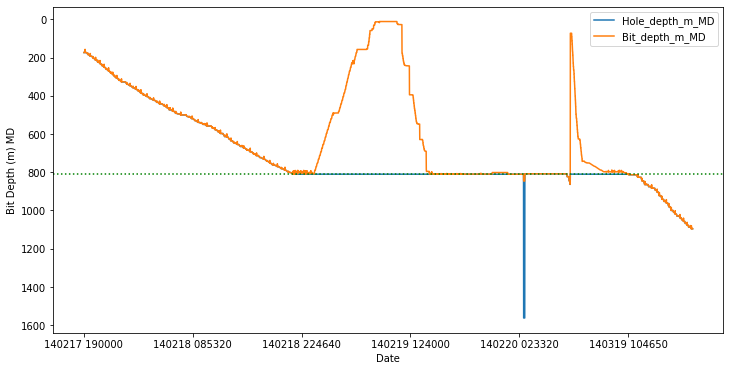

In [40]:
# Create the figure and axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first x and y axes:
df.plot(x = 'Date', y = 'Hole_depth_m_MD', ax = ax) 
df.plot(x = 'Date', y = 'Bit_depth_m_MD', ax = ax) 
ax.invert_yaxis()

plt.axhline(y=808, color='g', linestyle=':', linewidth= '1.5')
plt.ylabel('Bit Depth (m) MD')


plt.show()

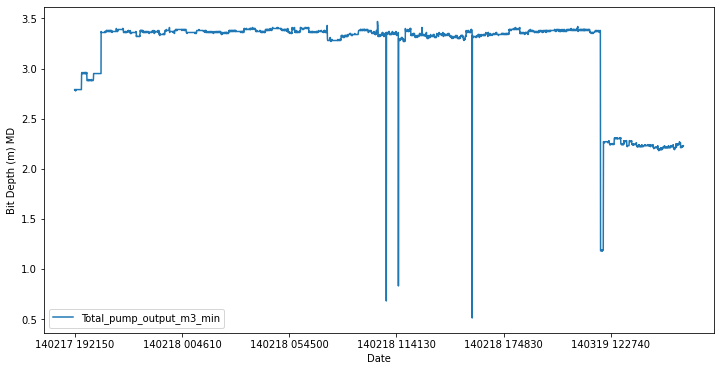

In [41]:
# Create the figure and axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first x and y axes:
dfwrg1.plot(x = 'Date', y = 'Total_pump_output_m3_min', ax = ax) 

plt.ylabel('Bit Depth (m) MD')

plt.show()

In [42]:
dfwrg1.shape

(5677, 9)

In [43]:
dfwrg2 = dfwrg1[dfwrg1['Total_pump_output_m3_min'] >= 3.0]

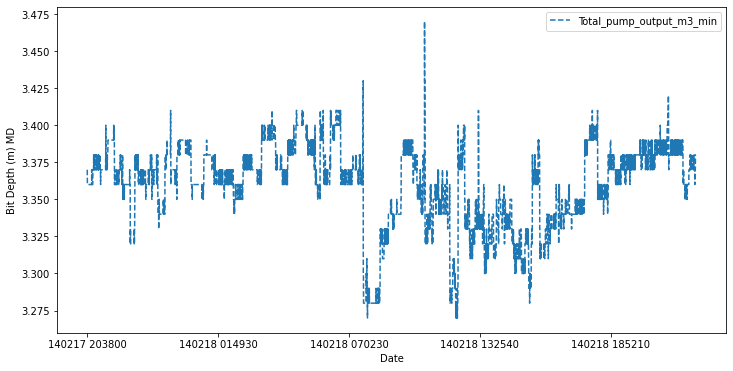

In [44]:
# Create the figure and axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first x and y axes:
dfwrg2.plot(x = 'Date', y = 'Total_pump_output_m3_min', ax = ax,linestyle='--', linewidth= '1.5') 


plt.ylabel('Bit Depth (m) MD')

plt.show()

In [45]:
def diagnostic_plots(df, variable):
    #function takes a dataframe (df) and 
    # the variable of interest as arguments
    
    # define figure size
    plt.figure(figsize=(16, 4))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins= 50)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Variable quantiles')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

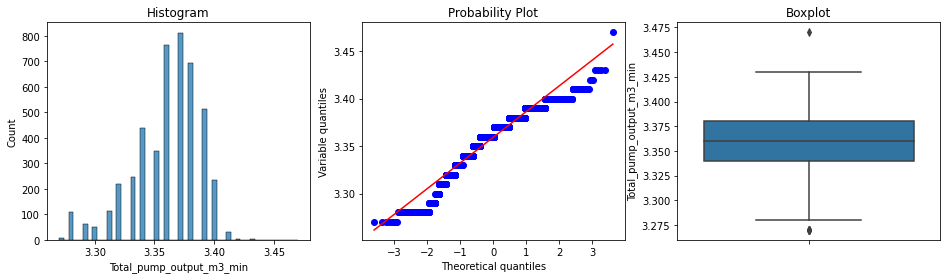

In [46]:
diagnostic_plots(dfwrg2, 'Total_pump_output_m3_min')

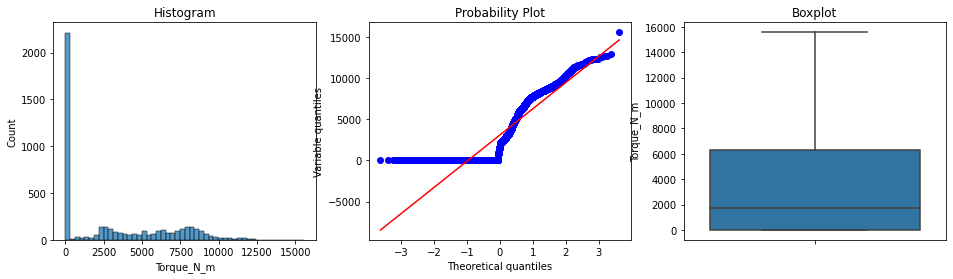

In [47]:
diagnostic_plots(dfwrg2, 'Torque_N_m')

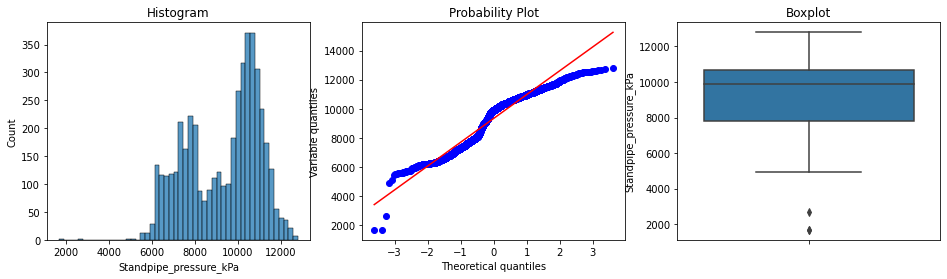

In [48]:
diagnostic_plots(dfwrg2, 'Standpipe_pressure_kPa')

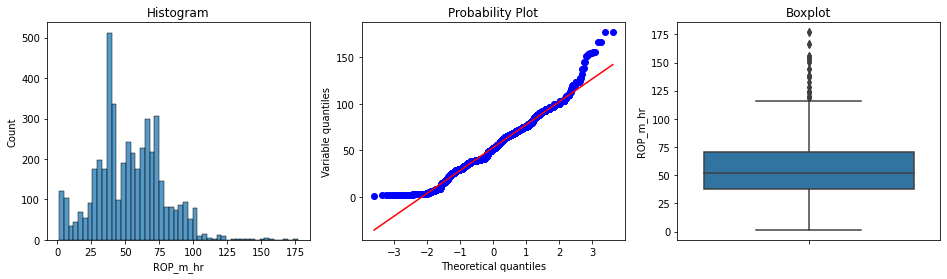

In [49]:
diagnostic_plots(dfwrg2, 'ROP_m_hr')

### 2.1.8.2 Checking and deleting ROP (m/hr) and Standpipe (kPa) outliers

In [50]:
# calculate the boundaries outside which sit the outliers
# for a Gaussian distribution

def find_normal_boundaries(df, variable):

    upper_boundary = dfwrg2[variable].mean() + 3 * dfwrg2[variable].std()
    lower_boundary = dfwrg2[variable].mean() - 3 * dfwrg2[variable].std()

    return upper_boundary, lower_boundary

In [51]:
# calculate boundaries for ROP
upper_boundary, lower_boundary = find_normal_boundaries(dfwrg2, 'ROP_m_hr')
upper_boundary, lower_boundary

(127.54258737062915, -20.889857362030703)

In [52]:
# inspect the number and percentage of outliers for ROP

print('total variables: {}'.format(len(dfwrg2)))

print('ROP with more than 127.54 m/hr (right end outliers): {}'.format(
    len(dfwrg2[dfwrg2['ROP_m_hr'] > upper_boundary])))

print()
print('% right end outliers: {}'.format(
    len(dfwrg2[dfwrg2['ROP_m_hr'] > upper_boundary]) / len(dfwrg2)))

total variables: 4652
ROP with more than 127.54 m/hr (right end outliers): 20

% right end outliers: 0.004299226139294927


Using Extreme Value Analysis we identified outliers at right end of the distribution of ROP. The percentage of outliers is small (0.429% considering 1 tail). That is, rare values, rare occurrences.

#### Note: From the above we conclude that values bigger than 127.54 occur very rarely for the variable ROP_m_hr. Therefore, we can consider them outliers.

In [53]:
# calculate boundaries for Standpipe Pressure

upper_boundary, lower_boundary = find_normal_boundaries(dfwrg2, 'Standpipe_pressure_kPa')
upper_boundary, lower_boundary

(14391.314006121942, 4282.293904454153)

In [54]:
# inspect the number and percentage of outliers for Standpipe Pressure

print('total variables: {}'.format(len(df1)))

print('Standpipe_pressure with less than  4280 (left end outliers): {}'.format(
    len(dfwrg2[dfwrg2['Standpipe_pressure_kPa'] < lower_boundary])))

print()
print('% left end outliers: {}'.format(
    len(dfwrg2[dfwrg2['Standpipe_pressure_kPa'] < lower_boundary]) / len(df1)))

total variables: 9002
Standpipe_pressure with less than  4280 (left end outliers): 3

% left end outliers: 0.00033325927571650743


In [55]:
# Deleting ROP and Standpipe Pressure outliers

dfwrg3 = dfwrg2.loc[(df1['ROP_m_hr'].abs()<=127) & (dfwrg2['Standpipe_pressure_kPa'].abs()>=4280)]
dfwrg3.describe().transpose()

count         mean          std      min      25%  \
Bit_depth_m_MD            4629.0   533.578801   172.257912   212.68   392.02   
Hook_load_kDaN            4629.0    28.145777     4.751091    16.00    25.10   
WOB_kDaN                  4629.0     8.621949     5.098720     0.10     4.90   
RPM                       4629.0    15.855908    16.005069     0.00     0.00   
Torque_N_m                4629.0  3085.313662  3539.579024     0.00     0.00   
Total_pump_output_m3_min  4629.0     3.359583     0.027869     3.27     3.34   
Standpipe_pressure_kPa    4629.0  9333.970836  1674.094717  4916.00  7811.00   
ROP_m_hr                  4629.0    52.926585    23.928464     1.43    37.81   

                              50%       75%       max  
Bit_depth_m_MD             520.00    699.98    808.59  
Hook_load_kDaN              28.50     31.80     44.70  
WOB_kDaN                     7.10     12.20     20.80  
RPM                          7.00     31.00     58.00  
Torque_N_m                1709.80   6289.98  15574.70  
Total_pump_output_m3_min     3.36      3.38      3.47  
Standpipe_pressure_kPa    9891.00  10687.00  12790.00  
ROP_m_hr                    52.06     70.02    124.03

In [56]:
dfwrg3.reset_index(drop=True)

Bit_depth_m_MD  Hook_load_kDaN  WOB_kDaN  RPM  Torque_N_m  \
0             212.68            26.0       1.9   33     1657.98   
1             212.89            25.7       5.3   33     2580.24   
2             213.17            23.3       6.0   33     3326.33   
3             213.45            23.5       6.2   33     3357.42   
4             213.72            23.5       6.9   34     4062.06   
...              ...             ...       ...  ...         ...   
4624          808.49            28.3       6.8   28     7315.85   
4625          808.54            29.3       5.6   28     6631.94   
4626          808.59            27.7       7.2   29     7388.39   
4627          808.59            28.9       5.5   28     6383.24   
4628          808.59            29.7       4.5   29     5523.16   

      Total_pump_output_m3_min  Standpipe_pressure_kPa  ROP_m_hr  \
0                         3.37                    6060      1.43   
1                         3.36                    6346     59.88   
2                         3.36                    6705    100.36   
3                         3.36                    6743     99.23   
4                         3.36                    6741     99.80   
...                        ...                     ...       ...   
4624                      3.38                   10718     37.42   
4625                      3.38                   10377     37.42   
4626                      3.38                   10501     37.42   
4627                      3.38                   10496     37.42   
4628                      3.38                   10420     37.42   

               Date  
0     140217 203800  
1     140217 203810  
2     140217 203820  
3     140217 203830  
4     140217 203840  
...             ...  
4624  140218 213810  
4625  140218 213820  
4626  140218 213830  
4627  140218 213840  
4628  140218 213850  

[4629 rows x 9 columns]

#### Note: After removing all the outliers, the size of this dataset was reduced from 5677 values to 4629 rows.

In [57]:
dfwrg3.to_csv(r'DrillingPWRG3.csv', index=False)

## - Check Dataset that Contains Zero (0) Values. 

In [58]:
dfwrg3.astype(bool).sum(axis=0)

Bit_depth_m_MD              4629
Hook_load_kDaN              4629
WOB_kDaN                    4629
RPM                         2363
Torque_N_m                  2461
Total_pump_output_m3_min    4629
Standpipe_pressure_kPa      4629
ROP_m_hr                    4629
Date                        4629
dtype: int64

As we can observe, RPM and Torque still have some zero values, and the reason why is because this intermediate section was drilled in Sliding drilling. 

Sliding drilling is when the drilling is performed without rotation of the drilling string, and the mud motor makes the bit rotate as drilling mud goes through the motor chamber. That is why surface RPM and surface Torque have zero (0) values.

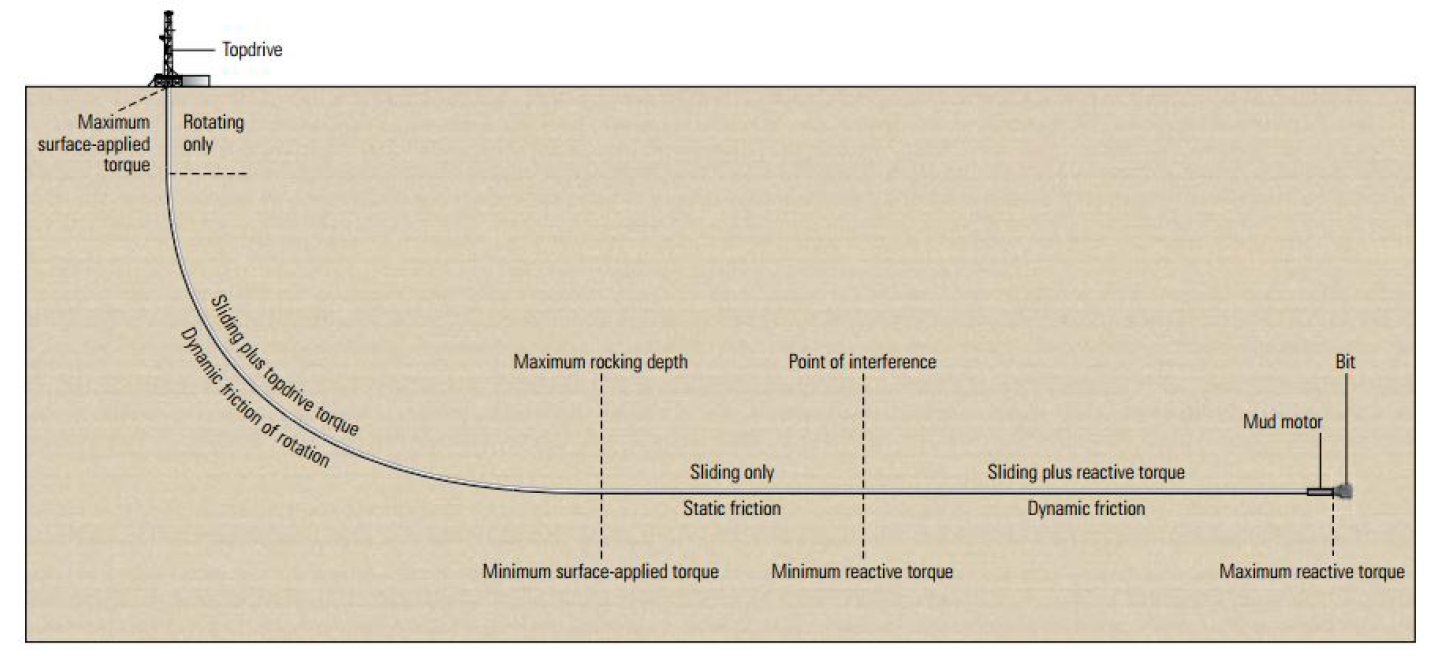

In [59]:
dfwrg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4629 entries, 588 to 9593
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bit_depth_m_MD            4629 non-null   float64
 1   Hook_load_kDaN            4629 non-null   float64
 2   WOB_kDaN                  4629 non-null   float64
 3   RPM                       4629 non-null   int64  
 4   Torque_N_m                4629 non-null   float64
 5   Total_pump_output_m3_min  4629 non-null   float64
 6   Standpipe_pressure_kPa    4629 non-null   int64  
 7   ROP_m_hr                  4629 non-null   float64
 8   Date                      4629 non-null   object 
dtypes: float64(6), int64(2), object(1)
memory usage: 361.6+ KB


In [60]:
#dropping date column
dfwrg2_1 = dfwrg3.copy() 

dfwrg2_1.drop(["Date"], axis = 1, inplace = True)

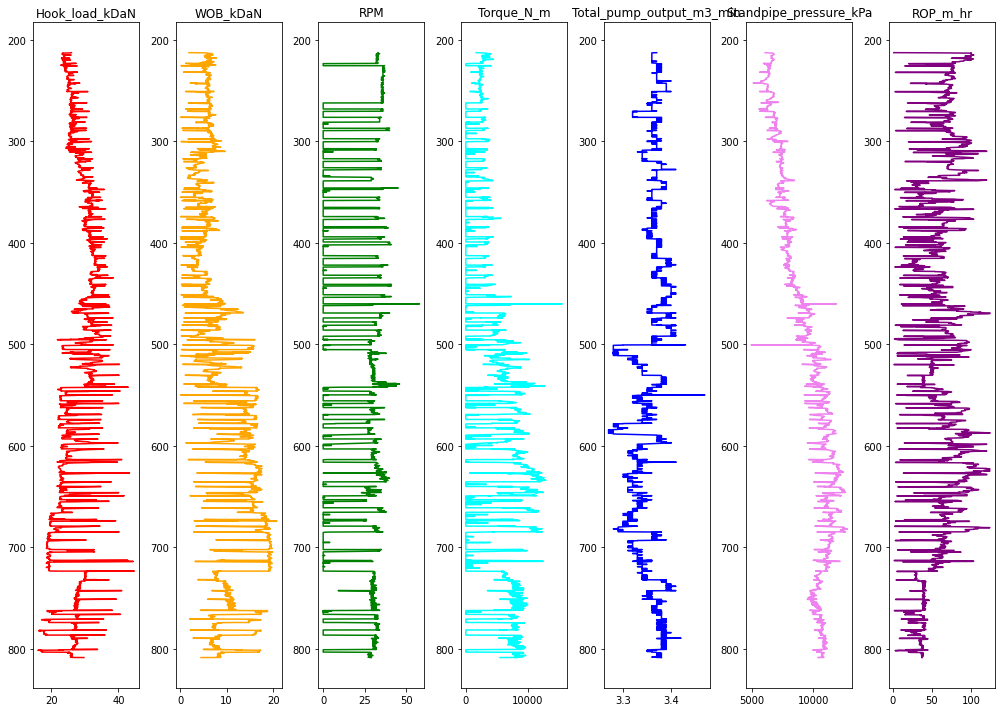

In [61]:
# Display logs

logs = dfwrg2_1.columns[1:]

colors = ['red', 'orange', 'green', 'cyan', 'blue', 'violet', 'purple']

plt.figure(figsize=(16,10))
for i in range(len(logs)):
  plt.subplot(1,8,i+1)
  plt.plot(dfwrg2_1[logs[i]], dfwrg2_1.Bit_depth_m_MD, color=colors[i])
  plt.title(logs[i])
  plt.gca().invert_yaxis()

plt.tight_layout()

###  - Check Histrogram for Each Feature - Final Dataset after EDA

#### Input features after EDA:

* 1. Bit depth (m MD)
* 2. Hook Load (kDaN)
* 3. WOB (kDaN)
* 4. RPM 
* 5. Torque (N-m)
* 6. Total Pump Output (m3/min)
* 7. Standpipe Pressure (kPa)

#### Target output

* Rate of Penetration - ROP (m/hr)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Bit_depth_m_MD'}>,
        <AxesSubplot:title={'center':'Hook_load_kDaN'}>,
        <AxesSubplot:title={'center':'WOB_kDaN'}>],
       [<AxesSubplot:title={'center':'RPM'}>,
        <AxesSubplot:title={'center':'Torque_N_m'}>,
        <AxesSubplot:title={'center':'Total_pump_output_m3_min'}>],
       [<AxesSubplot:title={'center':'Standpipe_pressure_kPa'}>,
        <AxesSubplot:title={'center':'ROP_m_hr'}>, <AxesSubplot:>]],
      dtype=object)

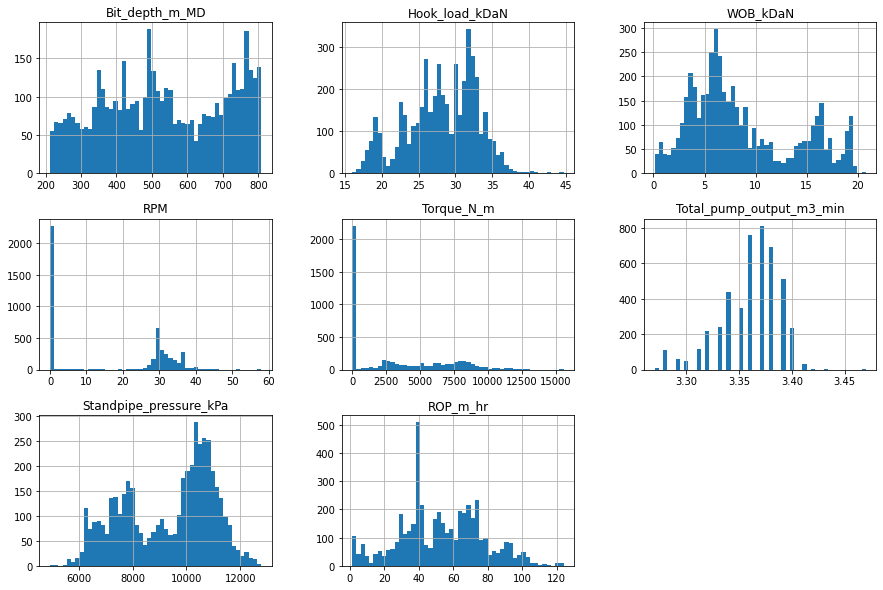

In [62]:
dfwrg3.hist(bins=50, figsize=(15, 10))

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('ROP_m_hr ~ (Bit_depth_m_MD) + (Hook_load_kDaN) + (WOB_kDaN) + (RPM) + (Torque_N_m) + (Total_pump_output_m3_min) + (Standpipe_pressure_kPa)',
           data=dfwrg3).fit()
anova_result = sm.stats.anova_lm(model, typ=3)
print(anova_result)
print(model.summary())

                                sum_sq      df            F         PR(>F)
Intercept                 7.854209e+03     1.0    19.333586   1.122243e-05
Bit_depth_m_MD            4.711817e+05     1.0  1159.840655  5.131268e-227
Hook_load_kDaN            4.167242e+04     1.0   102.579054   7.343387e-24
WOB_kDaN                  7.943799e+03     1.0    19.554117   1.000351e-05
RPM                       1.274028e+04     1.0    31.360920   2.266603e-08
Torque_N_m                4.301612e+02     1.0     1.058866   3.035277e-01
Total_pump_output_m3_min  4.314376e+03     1.0    10.620083   1.126755e-03
Standpipe_pressure_kPa    1.829387e+05     1.0   450.314130   1.931538e-95
Residual                  1.877267e+06  4621.0          NaN            NaN
                            OLS Regression Results                            
Dep. Variable:               ROP_m_hr   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:      

## 2.2 Training and Target Feature  

### Correlation Matrix

The Further away the correction coefficient from 0, the stronger the relationship between the two variables.

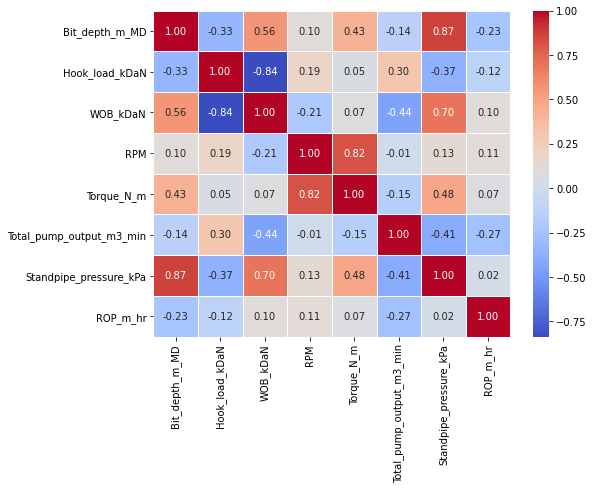

In [64]:
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(dfwrg3.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

In [65]:
print(dfwrg3.columns)

Index(['Bit_depth_m_MD', 'Hook_load_kDaN', 'WOB_kDaN', 'RPM', 'Torque_N_m',
       'Total_pump_output_m3_min', 'Standpipe_pressure_kPa', 'ROP_m_hr',
       'Date'],
      dtype='object')


In [66]:
dfwrg3.head().reset_index(drop=True)

Bit_depth_m_MD  Hook_load_kDaN  WOB_kDaN  RPM  Torque_N_m  \
0          212.68            26.0       1.9   33     1657.98   
1          212.89            25.7       5.3   33     2580.24   
2          213.17            23.3       6.0   33     3326.33   
3          213.45            23.5       6.2   33     3357.42   
4          213.72            23.5       6.9   34     4062.06   

   Total_pump_output_m3_min  Standpipe_pressure_kPa  ROP_m_hr           Date  
0                      3.37                    6060      1.43  140217 203800  
1                      3.36                    6346     59.88  140217 203810  
2                      3.36                    6705    100.36  140217 203820  
3                      3.36                    6743     99.23  140217 203830  
4                      3.36                    6741     99.80  140217 203840

## 2.3 Data Pre-Processing

### Apply Standard Scaling in all seven (7) input features

Since all the input features have different scales, there is a chance that higher weightage is given to some of the features with higher magnitudes which will impact the performance of the machine learning algorithm. Thus, standard scaling is applied in all seven (7) input features.

In [67]:
#https://www.journaldev.com/45109/normalize-data-in-python

from sklearn.preprocessing import StandardScaler

scaled_features = dfwrg3.copy()

col_names = ['Bit_depth_m_MD', 'Hook_load_kDaN', 'WOB_kDaN', 'RPM', 'Torque_N_m', 
             'Total_pump_output_m3_min', 'Standpipe_pressure_kPa']
features = scaled_features[col_names]


scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
scaled_features.head()


Bit_depth_m_MD  Hook_load_kDaN  WOB_kDaN       RPM  Torque_N_m  \
588       -1.863099       -0.451687 -1.318503  1.071282   -0.403293   
589       -1.861879       -0.514838 -0.651596  1.071282   -0.142709   
590       -1.860254       -1.020039 -0.514292  1.071282    0.068099   
591       -1.858628       -0.977939 -0.475062  1.071282    0.076884   
592       -1.857060       -0.977939 -0.337758  1.133769    0.275980   

     Total_pump_output_m3_min  Standpipe_pressure_kPa  ROP_m_hr           Date  
588                  0.373822               -1.955878      1.43  140217 203800  
589                  0.014962               -1.785021     59.88  140217 203810  
590                  0.014962               -1.570553    100.36  140217 203820  
591                  0.014962               -1.547852     99.23  140217 203830  
592                  0.014962               -1.549047     99.80  140217 203840

## 2.4 Cross-Validation dataset

### Input feature and target output list were created for this dataset.

Training and validation split of 80% and 20% is generated for the training set and test set, respectively.

In [68]:
impfeatures =['Bit_depth_m_MD', 'Hook_load_kDaN', 'WOB_kDaN', 'RPM',
              'Torque_N_m', 'Total_pump_output_m3_min','Standpipe_pressure_kPa']

target = ['ROP_m_hr']

print(impfeatures)
print(target)


X = scaled_features[impfeatures]
y = scaled_features[target]

ts=0.2

['Bit_depth_m_MD', 'Hook_load_kDaN', 'WOB_kDaN', 'RPM', 'Torque_N_m', 'Total_pump_output_m3_min', 'Standpipe_pressure_kPa']
['ROP_m_hr']


## Training set contains 3705 samples 
## Test set  contains 927 samples

In [86]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=ts)
print("my x_train===========================")
print(X_train)
print("My x_test ============================")
print(X_test)

print("My y_train ============================")
print(y_train)

print("My y_test =============================")
print(y_test)

my x_train===========================
      Bit_depth_m_MD  Hook_load_kDaN  WOB_kDaN       RPM  Torque_N_m  \
7466        0.852251       -1.167390  1.996413  0.883821    2.208379   
821        -1.699373       -0.620088 -0.553522  1.258743   -0.277392   
8513        1.250476       -0.156987  0.407607  0.883821    1.625741   
2096       -1.087782        0.727116 -1.063509  1.258743   -0.116358   
8504        1.244729       -0.009636  0.270303  0.883821    1.330024   
...              ...             ...       ...       ...         ...   
4819       -0.130103        1.842770 -1.436192  0.758847    0.027110   
3447       -0.544933        0.748167 -0.514292 -0.990787   -0.871755   
3158       -0.655186        0.979717 -0.926205 -0.990787   -0.871755   
2695       -0.827330        0.727116 -0.690826 -0.990787   -0.871755   
4039       -0.330870        0.642916 -0.141609 -0.990787   -0.871755   

      Total_pump_output_m3_min  Standpipe_pressure_kPa  
7466                 -2.497055          

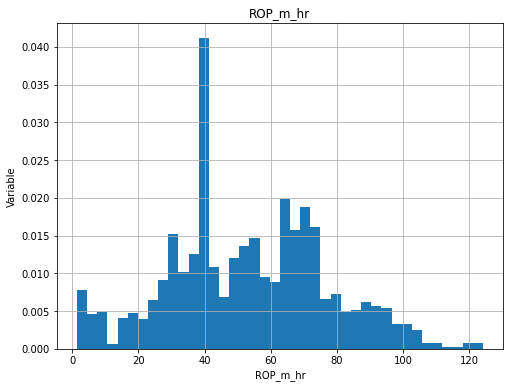

In [87]:
# histogran to evaluate target distribution

y_train.hist(bins=40, density=True)
plt.ylabel('Variable')
plt.xlabel('ROP_m_hr')
plt.show()

In [88]:
# Apply the Logarithm to transfor the target.  

y_train1 = np.log(y_train)
y_test1 = np.log(y_test)

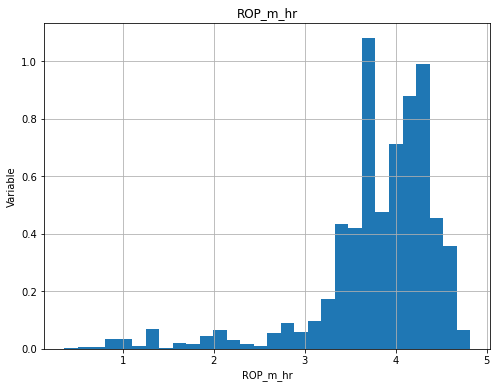

In [89]:
# histogran to evaluate target distribution after applying 
# the logarithm to the target

y_train1.hist(bins=30, density=True)
plt.ylabel('Variable')
plt.xlabel('ROP_m_hr')
plt.show()

#### Note: No improvement was shown when applying the logarithm to the target.

## 3. Results 

### What are the results?

## 3.1 Machine Learning Model 

Different Machine Learning algorithms are used in mLOS but the best Machine Learning algorithm is: 

 - Random Forest Regressor




### 3.1.1 Random Forest Regressor 

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

### 3.1.2 Feature Importance

In [91]:
rf.feature_importances_

array([0.43177374, 0.10751721, 0.11288703, 0.02712628, 0.05880035,
       0.05286514, 0.20903025])

In [92]:
X_train.columns

Index(['Bit_depth_m_MD', 'Hook_load_kDaN', 'WOB_kDaN', 'RPM', 'Torque_N_m',
       'Total_pump_output_m3_min', 'Standpipe_pressure_kPa'],
      dtype='object')

Text(0.5, 0, 'Relative Importance')

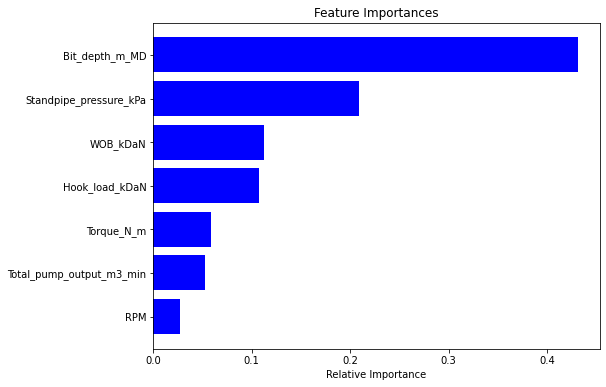

In [93]:
features=dfwrg3.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### 3.1.3 Predicting the Testset Results

In [94]:
y_pred = rf.predict(X_test)

### 3.1.4 Evaluating the Algorithm

In [95]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.947660475161989
Root Mean Squared Error: 9.265521817327128


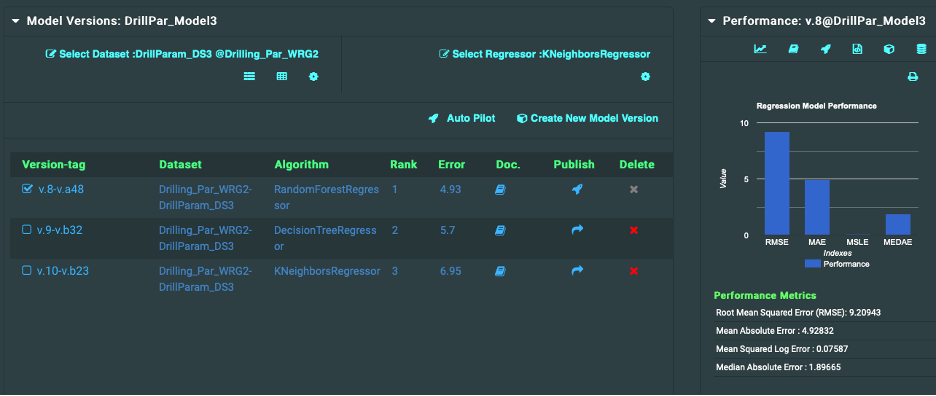

#### Note: The model executed using Random Forest regressor in python was compared with the best model created in mLOS as shown above. 

### 3.1.3.1 Coefficient of Determination, R^2 (R squared)

In [96]:
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.8431411570199556


### 3.1.3.2 Predicted vs Target - RandomForestRegressor

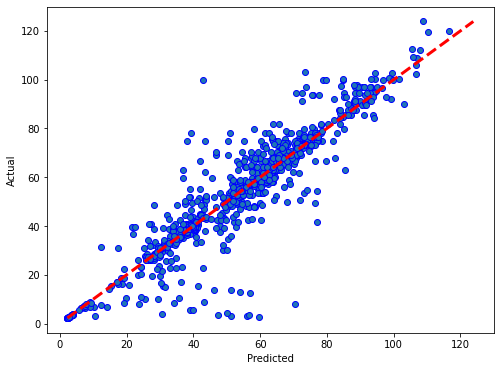

In [97]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

#### Note: The Predicted vs Target plot was also compared with mLOS and the results are pretty similar as shown below. 

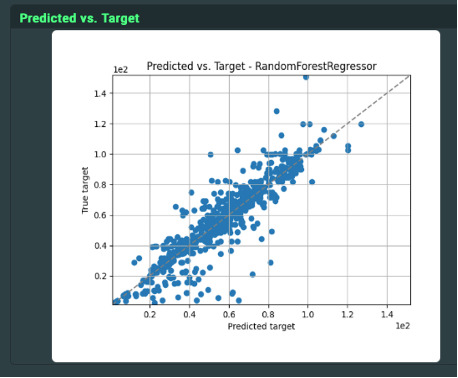

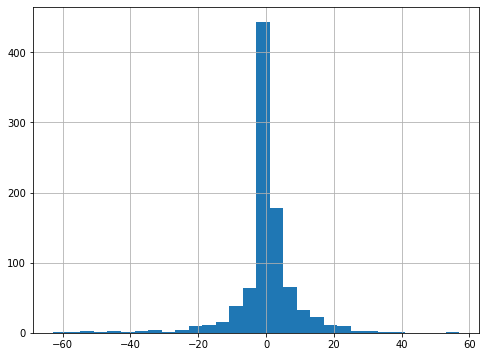

In [98]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test['ROP_m_hr'] - y_pred
errors.hist(bins=30)
plt.show()

#### Note: The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

In [99]:
# to save the model
import joblib

# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(rf, 'randon_forest.joblib') 

['randon_forest.joblib']

In [100]:
#let's now save the train and test sets!

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

## SHAP plot

Both the SHAP plot generated in mLOS and Python show that the most influential features to predict the rate of penetration ROP are Bit depth, standpipe pressure, and WOB. 

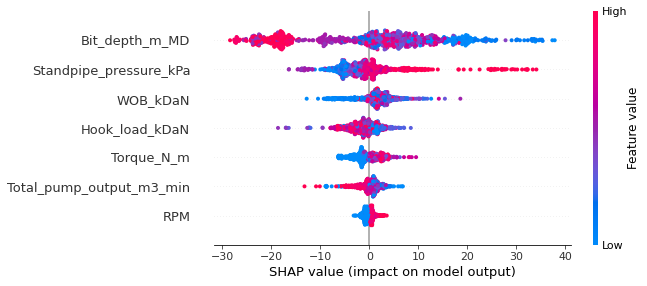

In [101]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

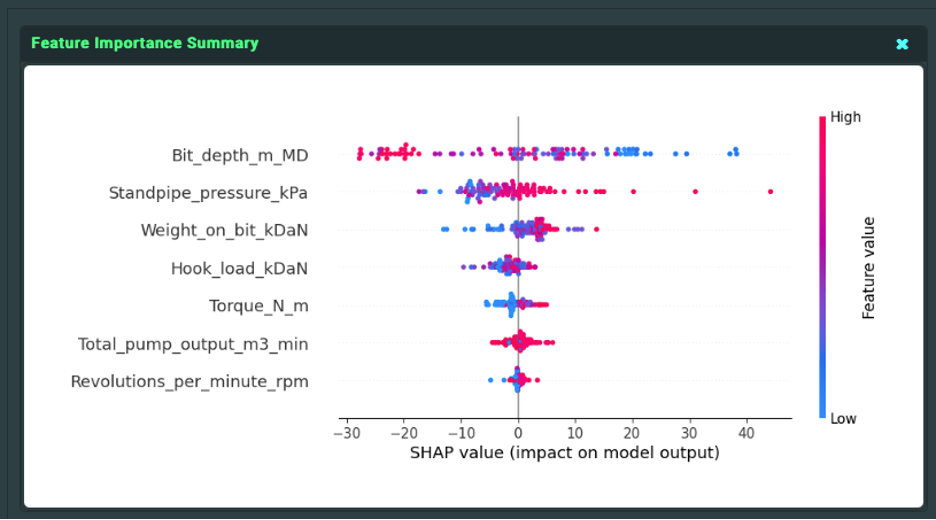

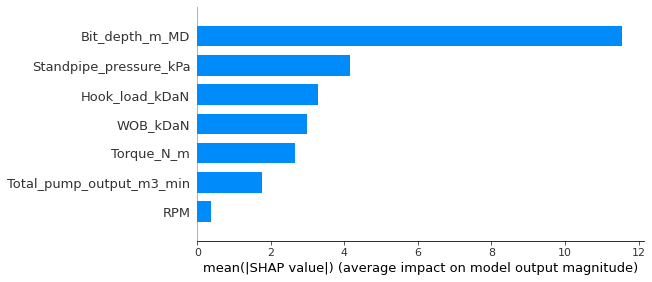

In [85]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

## 4. Model Deployment 

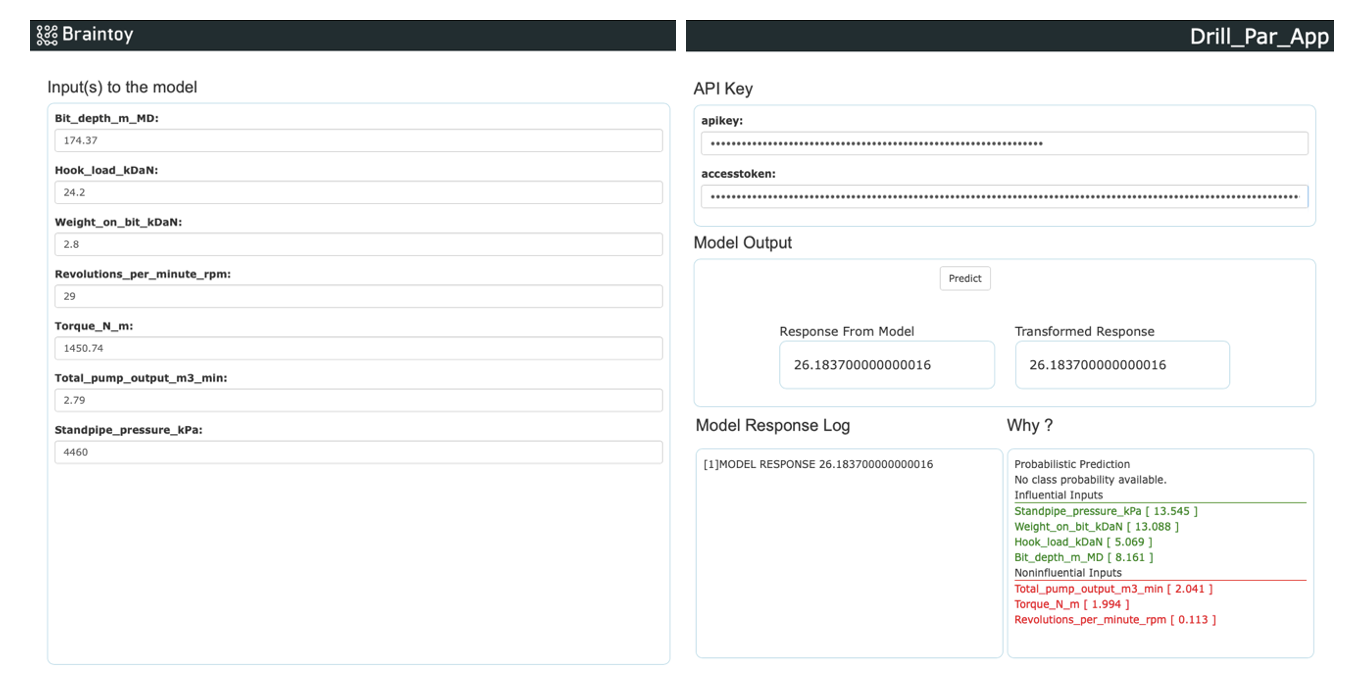

## 5. Conclusions 


- Based on the results shown in mLOS and Python the best model for the ROP prediction was the Random Forest regressor algorithm. The Mean absolute error (MAE) in mLOS and python was 4.92 and 5.03, respectively, and the Root Mean Squared Error (RMSE) in mLOS and Python was 9.21 and 9.26, respectively. 
- The coefficient of determination, denoted R^2 (R squared) was only computed in python with a result of 0.848. This coefficient is a measure of how well the model represents the variation of the data, the greater the better.
- Based on the results of RMSE, MAE, and R^2, the model is predicting accurately the rate of penetration (ROP) of the dataset that the machine was trained. 
- The RPM resulted in the lower value mainly because 48 percent of the data represents sliding drilling, so this feature has almost half of the values close to zero (0).

### 5.1 How could an organization or institution implement the use solution?

- The accuracy of this model will help drilling engineers predict the ROP for the injector well, based on the drilling parameters used in this analysis. 
- The rate of penetration (ROP) is the most important factor in drilling operations. Thus, analyzing the drilling parameters from previous wells can result in a significant increase in drilling performance for future wells.

### 5.2 Any lessons learned?

- The exploratory data analysis (EDA) is the most challenging and time-consuming task in this analysis. This EDA was performed step by step in Python and mLOS to avoid any mistakes while removing outliers. A single code in Python can show the box plots for each feature, and this will help users identify outliers in each feature.


### 5.3 How can the solution be improved?

- Some useful drilling parameters such as block height and differential pressure can be included in this analysis. These parameters will help the model have better predictions. 
- Downhole data coming from a Measurement While Drilling (MWD) tool can be included in this analysis, and help predict drilling problems. 